In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import folium
from geopy.distance import geodesic
from sklearn.cluster import KMeans

In [2]:
data = pd.read_excel('fatal-police-shootings-data-continental_US.xls')

In [3]:
data.shape

(7912, 16)

In [4]:
data

name       date   manner_of_death         armed  \
0          Jonathan David Victor 2017-05-12              shot       unarmed   
1     Christopher Michael Murray 2017-06-24              shot           NaN   
2           Elman Jerald Roberts 2018-09-08              shot           gun   
3          Terrence Edward White 2019-12-10              shot           gun   
4            Bernie Wade Johnson 2020-01-09  shot and Tasered        hammer   
...                          ...        ...               ...           ...   
7907        Thomas Joseph Roeber 2021-05-06              shot       vehicle   
7908             David Leon Fann 2021-06-25              shot           gun   
7909          Dale Vincent Query 2021-12-06              shot           gun   
7910      Ismael Trinidad Montes 2022-01-16              shot  sharp object   
7911                         NaN 2022-07-30              shot           gun   

       age gender race            city state  signs_of_mental_illness  \
0     35.0      M    W  Baldwin County    AL                    False   
1     24.0      M    W       Deer Park    AL                    False   
2     63.0      M    W      Citronelle    AL                    False   
3     66.0      M    W          Semmes    AL                     True   
4     34.0      M    W          Semmes    AL                     True   
...    ...    ...  ...             ...   ...                      ...   
7907  42.0      M  NaN          Casper    WY                    False   
7908  24.0      M  NaN          Lander    WY                    False   
7909  38.0      M  NaN           Basin    WY                     True   
7910  22.0      M  NaN        Gillette    WY                    False   
7911   NaN      M  NaN    Crook County    WY                    False   

     threat_level         flee  body_camera  longitude  latitude  \
0           other  Not fleeing        False   -122.276    37.779   
1           other  Not fleeing        False    -88.310    31.220   
2          attack  Not fleeing        False    -88.290    31.066   
3          attack  Not fleeing        False    -88.267    30.834   
4          attack  Not fleeing        False    -88.229    30.762   
...           ...          ...          ...        ...       ...   
7907       attack          Car        False        NaN       NaN   
7908       attack  Not fleeing        False        NaN       NaN   
7909       attack  Not fleeing        False        NaN       NaN   
7910       attack  Not fleeing        False        NaN       NaN   
7911       attack          NaN        False        NaN       NaN   

      is_geocoding_exact  
0                   True  
1                   True  
2                   True  
3                   True  
4                   True  
...                  ...  
7907                True  
7908                True  
7909                True  
7910                True  
7911                True  

[7912 rows x 16 columns]

In [5]:
data.isna().sum()

name                        453
date                          0
manner_of_death               0
armed                       207
age                         501
gender                       31
race                       1502
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        957
body_camera                   0
longitude                   827
latitude                    827
is_geocoding_exact            0
dtype: int64

In [6]:
filtered_df = data.dropna(subset=['latitude', 'longitude'])

In [7]:
df = filtered_df[["latitude", "longitude"]]
df.head()

latitude  longitude
0    37.779   -122.276
1    31.220    -88.310
2    31.066    -88.290
3    30.834    -88.267
4    30.762    -88.229

In [8]:
model = KMeans(n_clusters=3)
y_kmeans = model.fit_predict(df)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
y_kmeans

array([0, 1, 1, ..., 2, 2, 2])

In [10]:
# data['y'] = y_kmeans()
df = pd.concat([df, pd.DataFrame(y_kmeans, columns=["y"])], axis=1)

In [11]:
df

latitude  longitude  y
0       37.779   -122.276  0
1       31.220    -88.310  1
2       31.066    -88.290  1
3       30.834    -88.267  1
4       30.762    -88.229  1
...        ...        ... ..
7080    41.117   -104.826  2
7081    41.136   -104.787  2
7082    41.161   -104.768  2
7083    41.163   -104.767  2
7084    41.154   -104.725  2

[7085 rows x 3 columns]

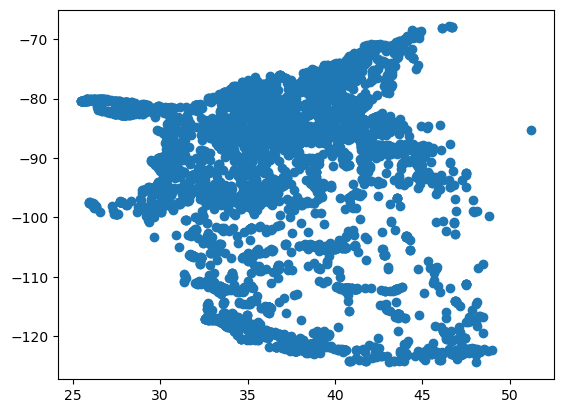

In [12]:
plt.scatter(df['latitude'], df['longitude'])

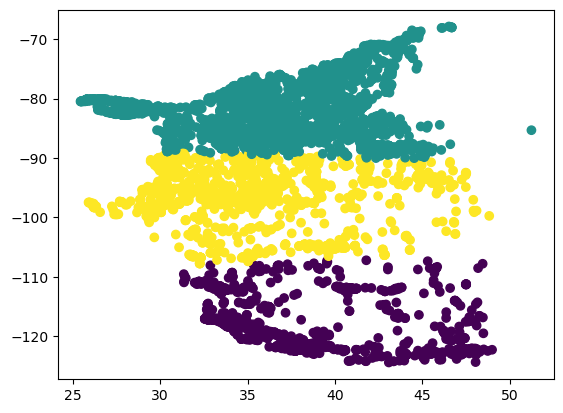

In [13]:
plt.scatter(df['latitude'], df['longitude'], c=df['y'])

In [14]:
model.inertia_

312880.1429418013

In [15]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i, n_init=10)
    y_kmeans = model.fit_predict(df)
    wcss.append(model.inertia_)

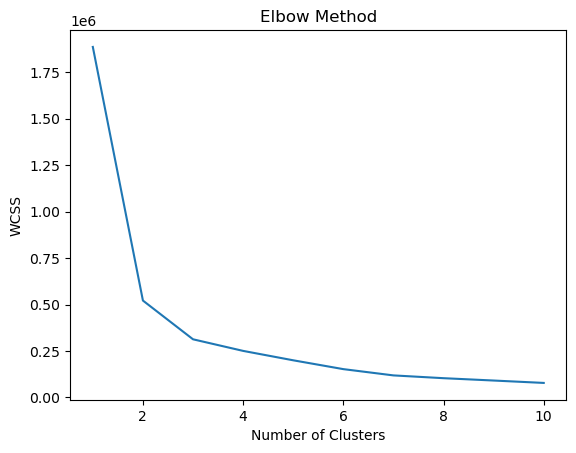

In [16]:
plt.plot(range(1,11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [17]:
cluster1 = df[['latitude','longitude']][df['y']==0].values.tolist()
cluster2 = df[['latitude','longitude']][df['y']==1].values.tolist()
cluster3 = df[['latitude','longitude']][df['y']==2].values.tolist()
# cluster4 = df[['latitude','longitude']][df['y']==3].values.tolist()

In [18]:
map = folium.Map(location=[data['latitude'].iloc[0],data['longitude'].iloc[0]], zoom_start = 10, tiles="openstreetmap")
map

In [19]:
for i in cluster1:
    folium.CircleMarker(i, radius=2, color='blue', fill_color='lightblue').add_to(map)
    
for i in cluster2:
    folium.CircleMarker(i, radius=2, color='red', fill_color='lightred').add_to(map)
    
for i in cluster3:
    folium.CircleMarker(i, radius=2, color='green', fill_color='lightgreen').add_to(map)    
    
# for i in cluster4:
#     folium.CircleMarker(i, radius=2, color='yellow', fill_color='lightyellow').add_to(map)        

In [20]:
map